In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\Trackmate analysis new 07052024\csv files\reformatted"
os.chdir(folder)
fname = "SPT_results_AIO_concat-Dcp1a_HOPS_condensates-BH.csv"
df_AIO = pd.read_csv(fname)

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 30
# alpha component threshold for constrained diffusion
# threshold_alpha = 0.7

### alpha per track distribution

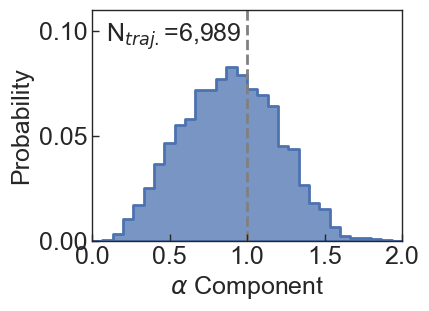

In [3]:
plt.figure(figsize=(4, 3))
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.6]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    legend=False,
)
plt.axvline(1, ls="--", c="gray", lw=2)
plt.text(
    0.09,
    0.095,
    r"N$_{traj.}$=" + f"{data.shape[0]:,}",
    fontdict={"fontsize": 18},
)
plt.xlim(0, 2)
plt.ylim(0, 0.11)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

### Angle distribution

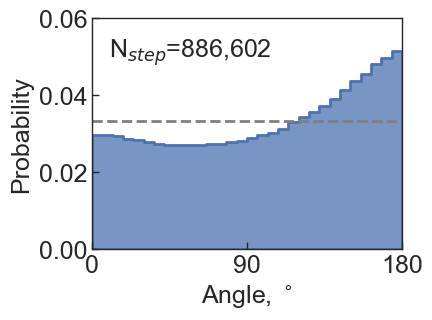

In [4]:
lst_angle = []
# lst_label = []
for _, row in df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    # labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    # lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        # "label": lst_label,
    },
    dtype=object,
)


plt.figure(figsize=(4, 3))
bins = 30
sns.histplot(
    data=data,
    x="angle",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    legend=False,
)
plt.axhline(1 / 30, ls="--", c="gray", lw=2)
plt.text(
    10,
    0.05,
    r"N$_{step}$=" + f"{data.shape[0]:,}",
    fontdict={"fontsize":18},
)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=300)

## Diffusion coefficient calculation for P-Bodies


P-body Diffusion Coefficient Statistics:


Condition,Total Trajectories,D > 0.01 µm²/s (%),D < 0.001 µm²/s (%)
"PB, Iso",310,12.26,34.84


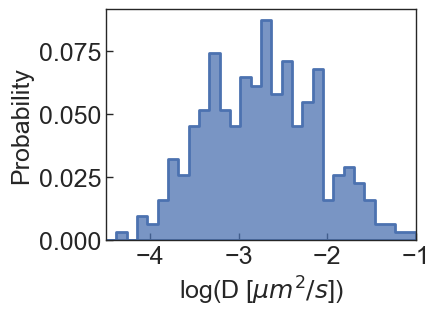

In [8]:
import os
from os.path import join, basename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(color_codes=True, style="white")

#%% Data Loading & Filtering
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\1x\trackmate redo 10292024\reformatted"
os.chdir(folder)
fname = "SPT_results_AIO_concat-Dcp1a_PB_condensates-BH.csv"
df_AIO = pd.read_csv(fname)

# Filtering parameters
immobile_stepsize_threshold_nm = 30
r2_threshold = 0.7

# Apply filters
filtered_data = df_AIO[
    (df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm) &
    (df_AIO["loglog_fit_R2"] > r2_threshold) &
    (df_AIO["alpha"] > 0)
].copy()

# Create logD column
filtered_data['logD'] = np.log10(filtered_data['linear_fit_D_um2s'])

#%% Visualization
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=filtered_data,
    x="logD",
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(-4.5, -1),
    lw=2,
    element="step",
    legend=False,
)

# Formatting
plt.xlim(-4.5, -1)
plt.ylim(0, None)
plt.xlabel(r'log(D [$\mu m^2/s$])', fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

#%% Annotation
# Calculate statistics
total_traj = len(filtered_data)
D_high = (filtered_data['linear_fit_D_um2s'] > 0.01).mean() * 100
D_low = (filtered_data['linear_fit_D_um2s'] < 0.001).mean() * 100

# # Add text annotations
# annotation_text = (
#     f"D > 0.01 µm²/s: {D_high:.1f}%\n"
#     f"D < 0.001 µm²/s: {D_low:.1f}%\n"
#     f"N$_{{traj.}}$ = {total_traj:,}"
# )

# plt.text(
#     0.05, 0.95,
#     annotation_text,
#     transform=ax.transAxes,
#     fontsize=12,
#     ha='left',
#     va='top',
#     bbox=dict(facecolor='white', alpha=0.5)
# )

#%% Save plot
plt.savefig("PB_D_distribution.png", format="png", bbox_inches="tight", dpi=300)

#%% Create summary table
pb_summary = pd.DataFrame({
    'Condition': ['PB, Iso'],
    'Total Trajectories': [total_traj],
    'D > 0.01 µm²/s (%)': [round(D_high, 2)],
    'D < 0.001 µm²/s (%)': [round(D_low, 2)]
})

# Display in Jupyter
print("\nP-body Diffusion Coefficient Statistics:")
display(pb_summary.style
        .hide(axis="index")
        .set_caption("P-body Diffusion Characteristics")
        .format(precision=2))

## Comparison of Diffusion parameters : alpha component probability distribution, 1x and 2x (PBodies vs HOPS)

In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
immobile_stepsize_threshold_nm = 30
def filter_data(df):
    return df[(df["mean_stepsize_nm"] > immobile_stepsize_threshold_nm) & 
              (df["loglog_fit_R2"] > 0.6) & 
              (df["alpha"] > 0)]

In [5]:
df_1x = load_and_label (csv_files_1, "PB, 1x")
df_2x = load_and_label (csv_files_2, "HOPS, 2x")

In [6]:
df_1x = filter_data(df_1x)
df_2x = filter_data(df_2x)

In [7]:
combined_data = pd.concat([df_1x, df_2x], ignore_index=True)

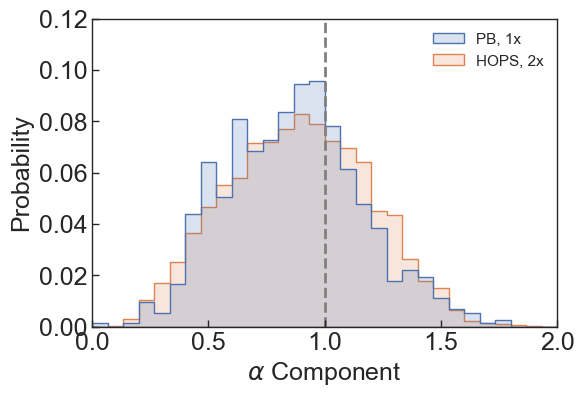

In [12]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6,4))
ax = sns.histplot(
    data=combined_data,
    x='alpha',
    hue='label',
    bins=30,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)
plt.axvline(1, ls="--", c="gray", lw=2)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlim(0, 2)
plt.ylim(0, 0.12)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)


## Comparison of Diffusion parameters : angle distribution, 1x and 2x (PBodies vs HOPS)

In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
df_1x = load_and_label (csv_files_1, "PB, Iso")
df_2x = load_and_label (csv_files_2, "HOPS")

In [5]:
df_combined = pd.concat([df_1x, df_2x], ignore_index=True)

In [6]:
# Filter the data first
filtered_df = df_combined[(df_combined["mean_stepsize_nm"] > 30)]
lst_angle = []
lst_condition = []

for _, row in filtered_df.iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    lst_angle.extend(angles)
    lst_condition.extend([row["label"]] * len(angles))

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_condition,
    },
    dtype=object,
)

In [11]:
# # Calculate the number of unique track IDs after filtering for each unique filename and sum them
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['label'] == condition]
    unique_filenames = condition_df['filename'].unique()
    unique_trackID_count = 0
    for filename in unique_filenames:
        unique_trackID_count += condition_df[condition_df['filename'] == filename]['trackID'].nunique()
    return unique_trackID_count

n_PB = calculate_unique_trackID_count(filtered_df, 'PB, Iso')
n_HOPS = calculate_unique_trackID_count(filtered_df, 'HOPS')

In [13]:
# Cell: Calculate and display angle statistics (simpler version)
print("\n" + "="*50)
print("ANGLE DISTRIBUTION STATISTICS")
print("="*50)

for condition in data['label'].unique():
    condition_data = data[data['label'] == condition]
    mean_angle = condition_data['angle'].mean()
    std_angle = condition_data['angle'].std()
    median_angle = condition_data['angle'].median()
    count = len(condition_data)
    
    print(f"\n{condition}:")
    print(f"  Mean angle = {mean_angle:.2f}°")
    print(f"  Std angle = {std_angle:.2f}°")
    print(f"  Median angle = {median_angle:.2f}°")
    print(f"  N = {count:,} angles")
    print(f"  Range = [{condition_data['angle'].min():.2f}°, {condition_data['angle'].max():.2f}°]")

print("\n" + "="*50)


ANGLE DISTRIBUTION STATISTICS

PB, Iso:
  Mean angle = 94.16°
  Std angle = 54.18°
  Median angle = 96.74°
  N = 46,784 angles
  Range = [0.00°, 180.00°]

HOPS:
  Mean angle = 99.76°
  Std angle = 53.84°
  Median angle = 106.14°
  N = 886,602 angles
  Range = [0.00°, 180.00°]



c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

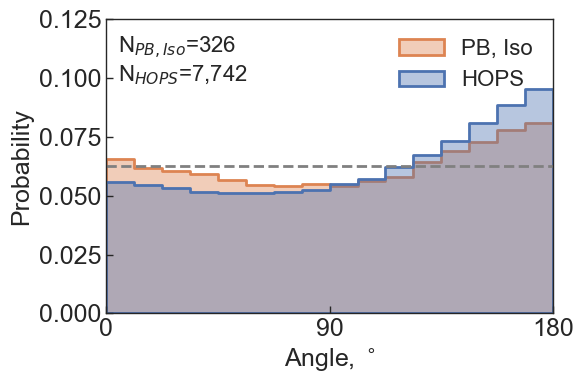

In [14]:
color_dict = {"PB, Iso": "#DD8452", "HOPS": "#4C72B0"}
plt.figure(figsize=(6, 4))
bins = 16
ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["HOPS", "PB, Iso"]
)
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['PB, Iso', 'HOPS'], fontsize=16) 
# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.125)
# plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Customize the legend
legend = ax.get_legend()
if legend is not None:
    legend.set_title(None)
    legend_frame = legend.get_frame()
    legend_frame.set_visible(False)

# Display the number of unique track IDs on the plot
plt.text(
    5,
    0.1105,
    r"N$_{PB, Iso}$=" + f"{n_PB:,}",
    fontdict={"fontsize": 16},
)

plt.text(
    5,
    0.09855,
    r"N$_{HOPS}$=" + f"{n_HOPS:,}",
    fontdict={"fontsize": 16},
)

# Final layout adjustments and saving
plt.tight_layout()
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

## Angle distribution : -Noco vs +Noco, 30 mins

In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

# Function to load CSV files and add a 'Condition' column
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Use file dialog to select CSV files for each condition
# Ensure correct association with the label
csv_files_noco_neg = filedialog.askopenfilenames(
    title="Select CSV Files for - Noco",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_noco_pos = filedialog.askopenfilenames(
    title="Select CSV Files for + Noco",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

# Load and label datasets for each condition
df_noco_neg = load_and_label(csv_files_noco_neg, "- Noco")
df_noco_pos = load_and_label(csv_files_noco_pos, "+ Noco")

# Combine the labeled DataFrames
df_combined = pd.concat([df_noco_neg, df_noco_pos], ignore_index=True)

# Filter the data
filtered_df = df_combined[df_combined["mean_stepsize_nm"] > 30]

lst_angle = []
lst_condition = []

for _, row in filtered_df.iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    lst_angle.extend(angles)
    lst_condition.extend([row["label"]] * len(angles))

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_condition,
    },
    dtype=object,
)

# Calculate the number of unique track IDs after filtering
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['label'] == condition]
    unique_filenames = condition_df['filename'].unique()
    unique_trackID_count = 0
    for filename in unique_filenames:
        unique_trackID_count += condition_df[condition_df['filename'] == filename]['trackID'].nunique()
    return unique_trackID_count

n_noco_neg = calculate_unique_trackID_count(filtered_df, '- Noco')
n_noco_pos = calculate_unique_trackID_count(filtered_df, '+ Noco')


C:\Users\bisal\AppData\Local\Temp\2\ipykernel_15276\2060984254.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = ax.legend_.legendHandles[::-1]


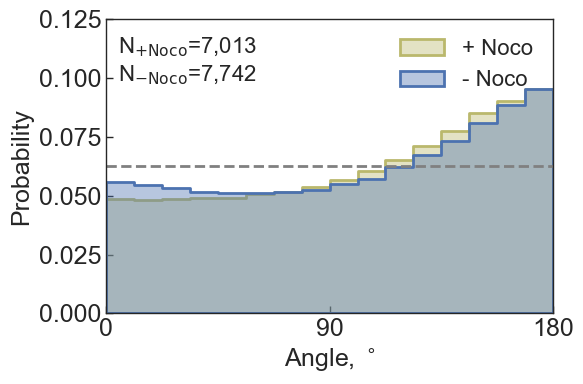

In [2]:
color_dict = {"- Noco": "#4C72B0", "+ Noco": "#BAB86C"}
plt.figure(figsize=(6, 4))
bins = 16

ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["- Noco", "+ Noco"]
)

# Reverse handles and labels together to get "- Noco" first
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['+ Noco', '- Noco'], fontsize=16, frameon=False) 

# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.125)
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)

# Customize axes and ticks
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,  # This ensures y-axis ticks are visible
    length=5,
    width=1,
)

# Annotation
plt.text(5, 0.1105, r"N$_{+\text{Noco}}$=" + f"{n_noco_pos:,}", fontsize=16)
plt.text(5, 0.09855, r"N$_{-\text{Noco}}$=" + f"{n_noco_neg:,}", fontsize=16)

plt.tight_layout()
plt.savefig("angle_histo_noco.png", dpi=600, bbox_inches="tight")
plt.show()

## Angle distribution : -LatA vs +LatA, 30 mins

In [3]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tkinter import filedialog

sns.set(color_codes=True, style="white")

# Function to load CSV files and add a 'Condition' column
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Use file dialog to select CSV files for each condition
# Ensure correct association with the label
csv_files_lata_neg = filedialog.askopenfilenames(
    title="Select CSV Files for - LatA",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_lata_pos = filedialog.askopenfilenames(
    title="Select CSV Files for + LatA",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

# Load and label datasets for each condition
df_lata_neg = load_and_label(csv_files_lata_neg, "- LatA")
df_lata_pos = load_and_label(csv_files_lata_pos, "+ LatA")

# Combine the labeled DataFrames
df_combined = pd.concat([df_lata_neg, df_lata_pos], ignore_index=True)

# Filter the data
filtered_df = df_combined[df_combined["mean_stepsize_nm"] > 30]

lst_angle = []
lst_condition = []

for _, row in filtered_df.iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    lst_angle.extend(angles)
    lst_condition.extend([row["label"]] * len(angles))

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_condition,
    },
    dtype=object,
)

# Calculate the number of unique track IDs after filtering
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['label'] == condition]
    unique_filenames = condition_df['filename'].unique()
    unique_trackID_count = 0
    for filename in unique_filenames:
        unique_trackID_count += condition_df[condition_df['filename'] == filename]['trackID'].nunique()
    return unique_trackID_count

n_lata_neg = calculate_unique_trackID_count(filtered_df, '- LatA')
n_lata_pos = calculate_unique_trackID_count(filtered_df, '+ LatA')


C:\Users\bisal\AppData\Local\Temp\2\ipykernel_15276\2094579144.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = ax.legend_.legendHandles[::-1]


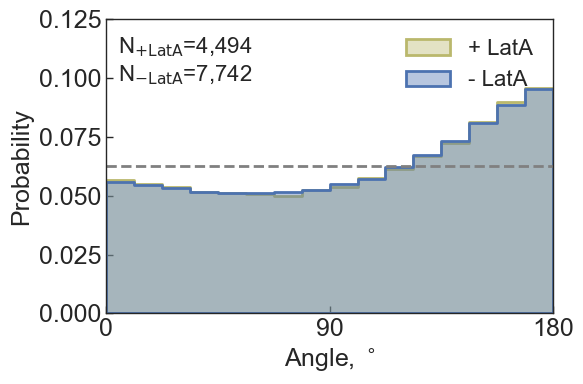

In [4]:
color_dict = {"- LatA": "#4C72B0", "+ LatA": "#BAB86C"}
plt.figure(figsize=(6, 4))
bins = 16

ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["- LatA", "+ LatA"]
)

# Reverse handles and labels
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['+ LatA', '- LatA'], fontsize=16, frameon=False) 

# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.125)
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)

# Customize axes and ticks - with explicit left/bottom parameters
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,  # Ensures x-axis ticks
    left=True,    # Ensures y-axis ticks
    length=5,
    width=1
)

# Annotation
plt.text(5, 0.1105, r"N$_{+\text{LatA}}$=" + f"{n_lata_pos:,}", fontsize=16)
plt.text(5, 0.09855, r"N$_{-\text{LatA}}$=" + f"{n_lata_neg:,}", fontsize=16)

plt.tight_layout()
plt.savefig("angle_histo_latA.png", dpi=600, bbox_inches="tight")
plt.show()